In [1]:
import os
import cv2
import numpy as np
os.chdir("/tf/notebooks/src")
from ..utils import polar, display

2023-05-12 14:59:28.832845: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


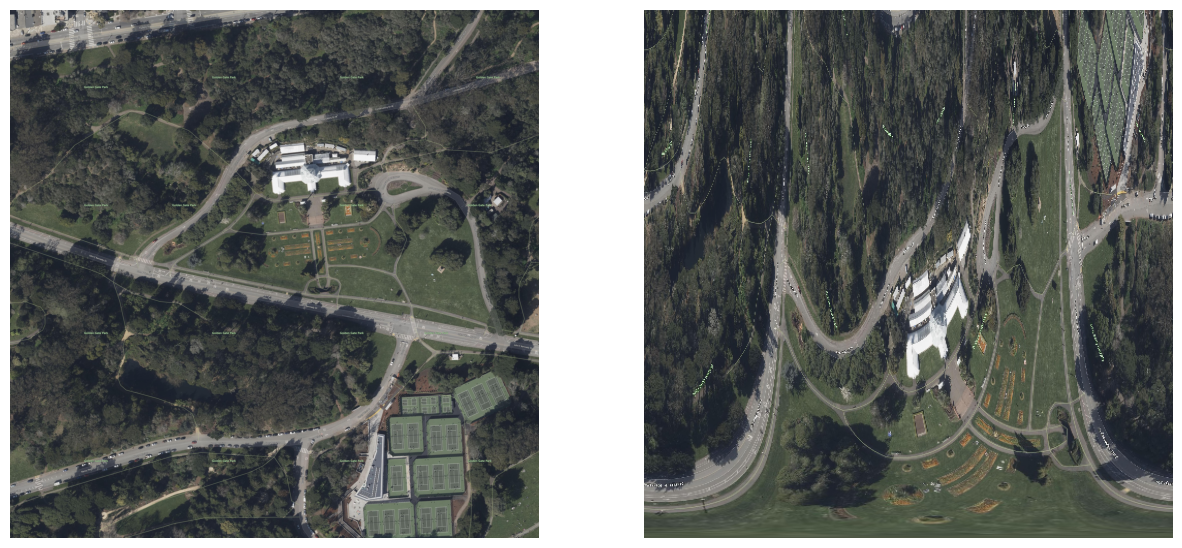

In [2]:
file_name = "aaelw.jpg"
img_sat = cv2.imread("/tf/CVUSA/satellite/"+file_name)
img_sat = cv2.cvtColor(img_sat, cv2.COLOR_BGR2RGB)
display([img_sat, polar(img_sat)])

In [32]:
# This script runs through a given directory, polar transforms all the images and then writes them
# to the destination.  Doing it once offline seems more efficient than for every training step.

dest = "/tf/CVUSA/satellite_polar/"

files = os.listdir("/tf/CVUSA/satellite")
total = len(files)
count = 0
print("Total: ", total, end="")

for file_name in files:
    img_sat = cv2.imread("/tf/CVUSA/satellite/" + file_name)
    img_sat = cv2.cvtColor(img_sat, cv2.COLOR_BGR2RGB)
    img_pol = np.multiply(polar(img_sat), 255)
    cv2.imwrite(dest + file_name, img_pol)

    count += 1
    if count % 100 == 0:
        percent = round((float(count)/float(total))*100, 0)
        print(f"\r{'#' * int(percent)} {percent}%", end="")


################################################################################################## 98.0%